<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST-104---ADVANCED-MACHINE-LEARNING/blob/main/3B_VICTORIA_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST 104 - ADVANCED MACHINE LEARNING**

**LESLY-ANN B. VICTORIA from BSCS-IS-3B - ASSESSMENT TASK 4**

**"Logistic Regression (Titanic Dataset)"**

**1. Import Necessary Libraries:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

**2. Load the Dataset:**

In [ ]:
# Load the dataset
df = pd.read_csv('titanic_data.csv')

**3. Select Features and Target Variable:**

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

**4. Preprocess the Data:**

In [ ]:
# Separating X and y
X = df[features]
y = df[target]

# Handling missing values and encoding categorical variables
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

**5. Split the Data into Training and Test Sets:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6. Create and Train the Logistic Regression Model:**

In [ ]:
# Creating the logistic regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
# Fitting the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

**7. Make Predictions and Evaluate the Model:**

In [ ]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.7988826815642458
Confusion Matrix: 
[[90 15]
 [21 53]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# **Activity 4 - Data Visualization**

In [ ]:
#Print of how many null each variable.
print(df.isnull().sum())

#Print the summary state.
summary_state = df.describe()
print('\n', summary_state)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429 

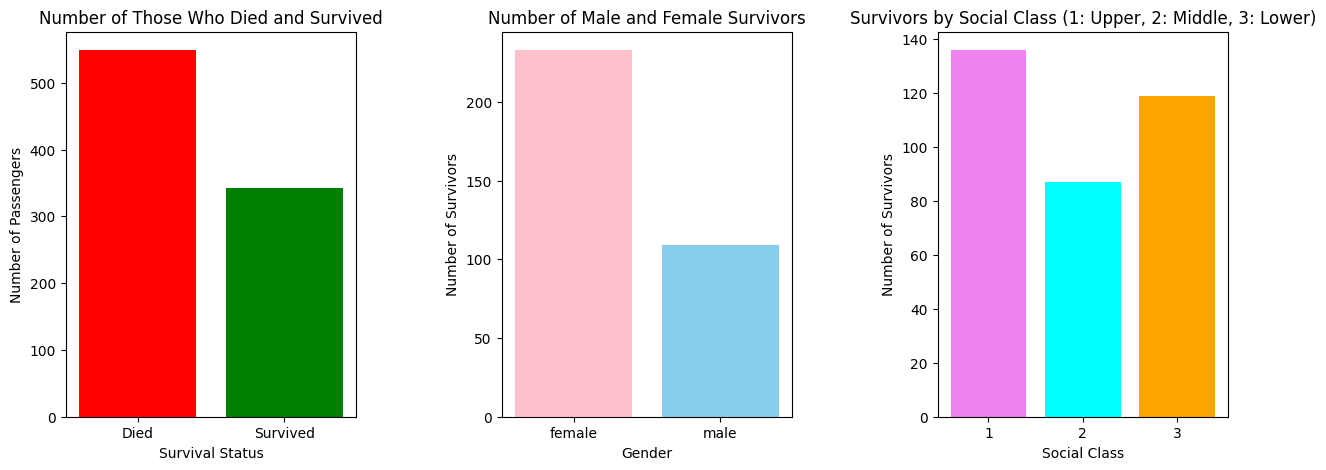

In [ ]:
#Bar plot for the count of passengers who died and survived
plt.figure(figsize=(15, 5))
survived_count = df['Survived'].value_counts()
plt.subplot(1, 3, 1)
plt.bar(['Died', 'Survived'], survived_count, color=['red', 'green'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Number of Those Who Died and Survived')

#Bar plot for the count of male and female survivors
plt.subplot(1, 3, 2)
survived = df[df['Survived'] == 1]
survived_gender = survived['Sex'].value_counts()
plt.bar(survived_gender.index, survived_gender.values, color=['pink', 'skyblue'])
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.title('Number of Male and Female Survivors')

#Bar plot for the count of survivors by social class
plt.subplot(1, 3, 3)
survived_pclass = survived['Pclass'].value_counts()
plt.bar(survived_pclass.index, survived_pclass.values, color=['violet', 'orange', 'cyan'])
plt.xlabel('Social Class')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Social Class (1: Upper, 2: Middle, 3: Lower)')

plt.subplots_adjust(wspace=0.5)
plt.show()

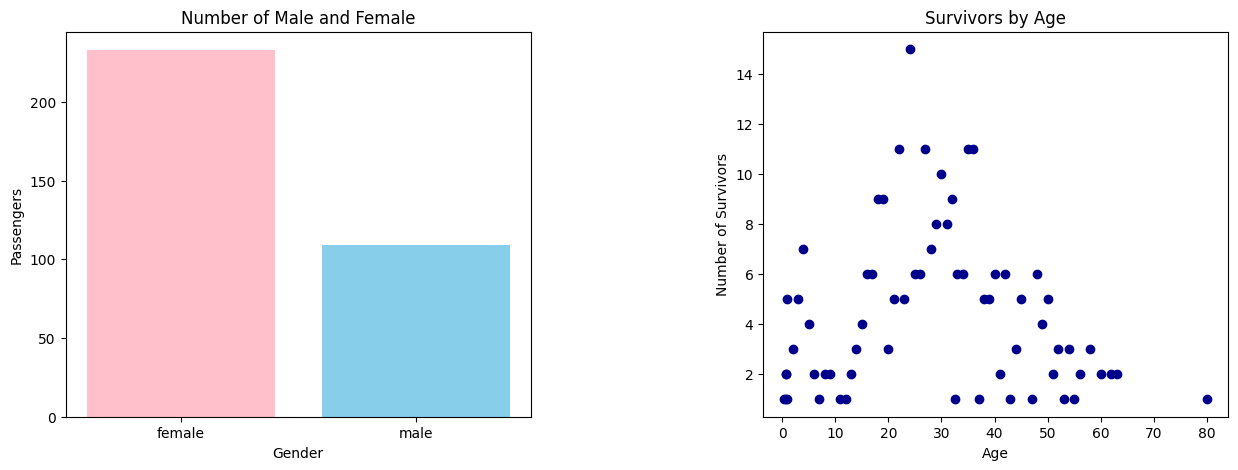

In [ ]:
#Bar plot for the count of male and female passengers
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
gender = survived['Sex'].value_counts()
plt.bar(gender.index, gender.values, color=['pink', 'skyblue'])
plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.title('Number of Male and Female')

#Scatter plot for the count of survivors by age
plt.subplot(1, 2, 2)
survived_age = survived['Age'].value_counts()
plt.scatter(survived_age.index, survived_age.values, color=['darkblue'])
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Age')

plt.subplots_adjust(wspace=0.5)
plt.show()

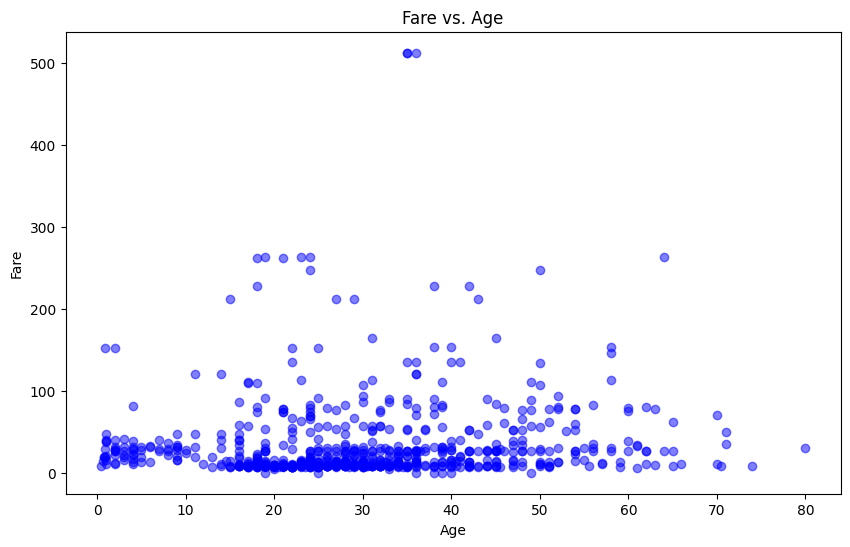

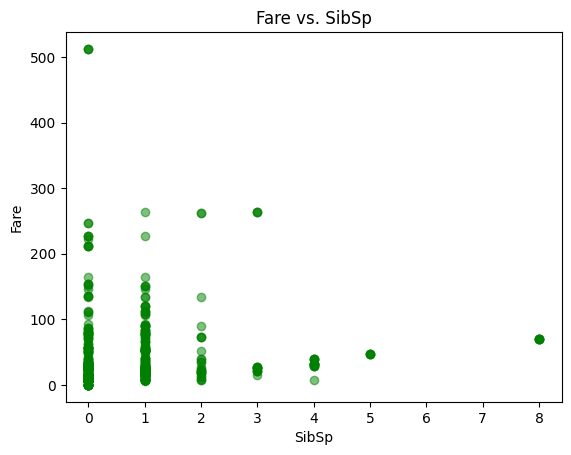

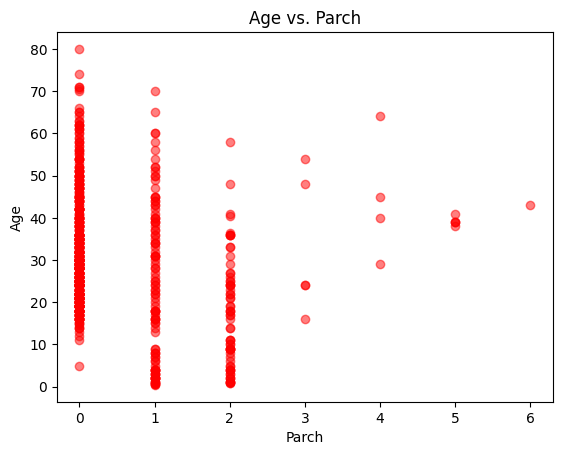

In [ ]:
#Fare vs. Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], color='blue', alpha=0.5)
plt.title('Fare vs. Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

#Fare vs. SibSp
plt.scatter(df['SibSp'], df['Fare'], color='green', alpha=0.5)
plt.title('Fare vs. SibSp')
plt.xlabel('SibSp')
plt.ylabel('Fare')
plt.show()

#Age vs. Parch
plt.scatter(df['Parch'], df['Age'], color='red', alpha=0.5)
plt.title('Age vs. Parch')
plt.xlabel('Parch')
plt.ylabel('Age')
plt.show()

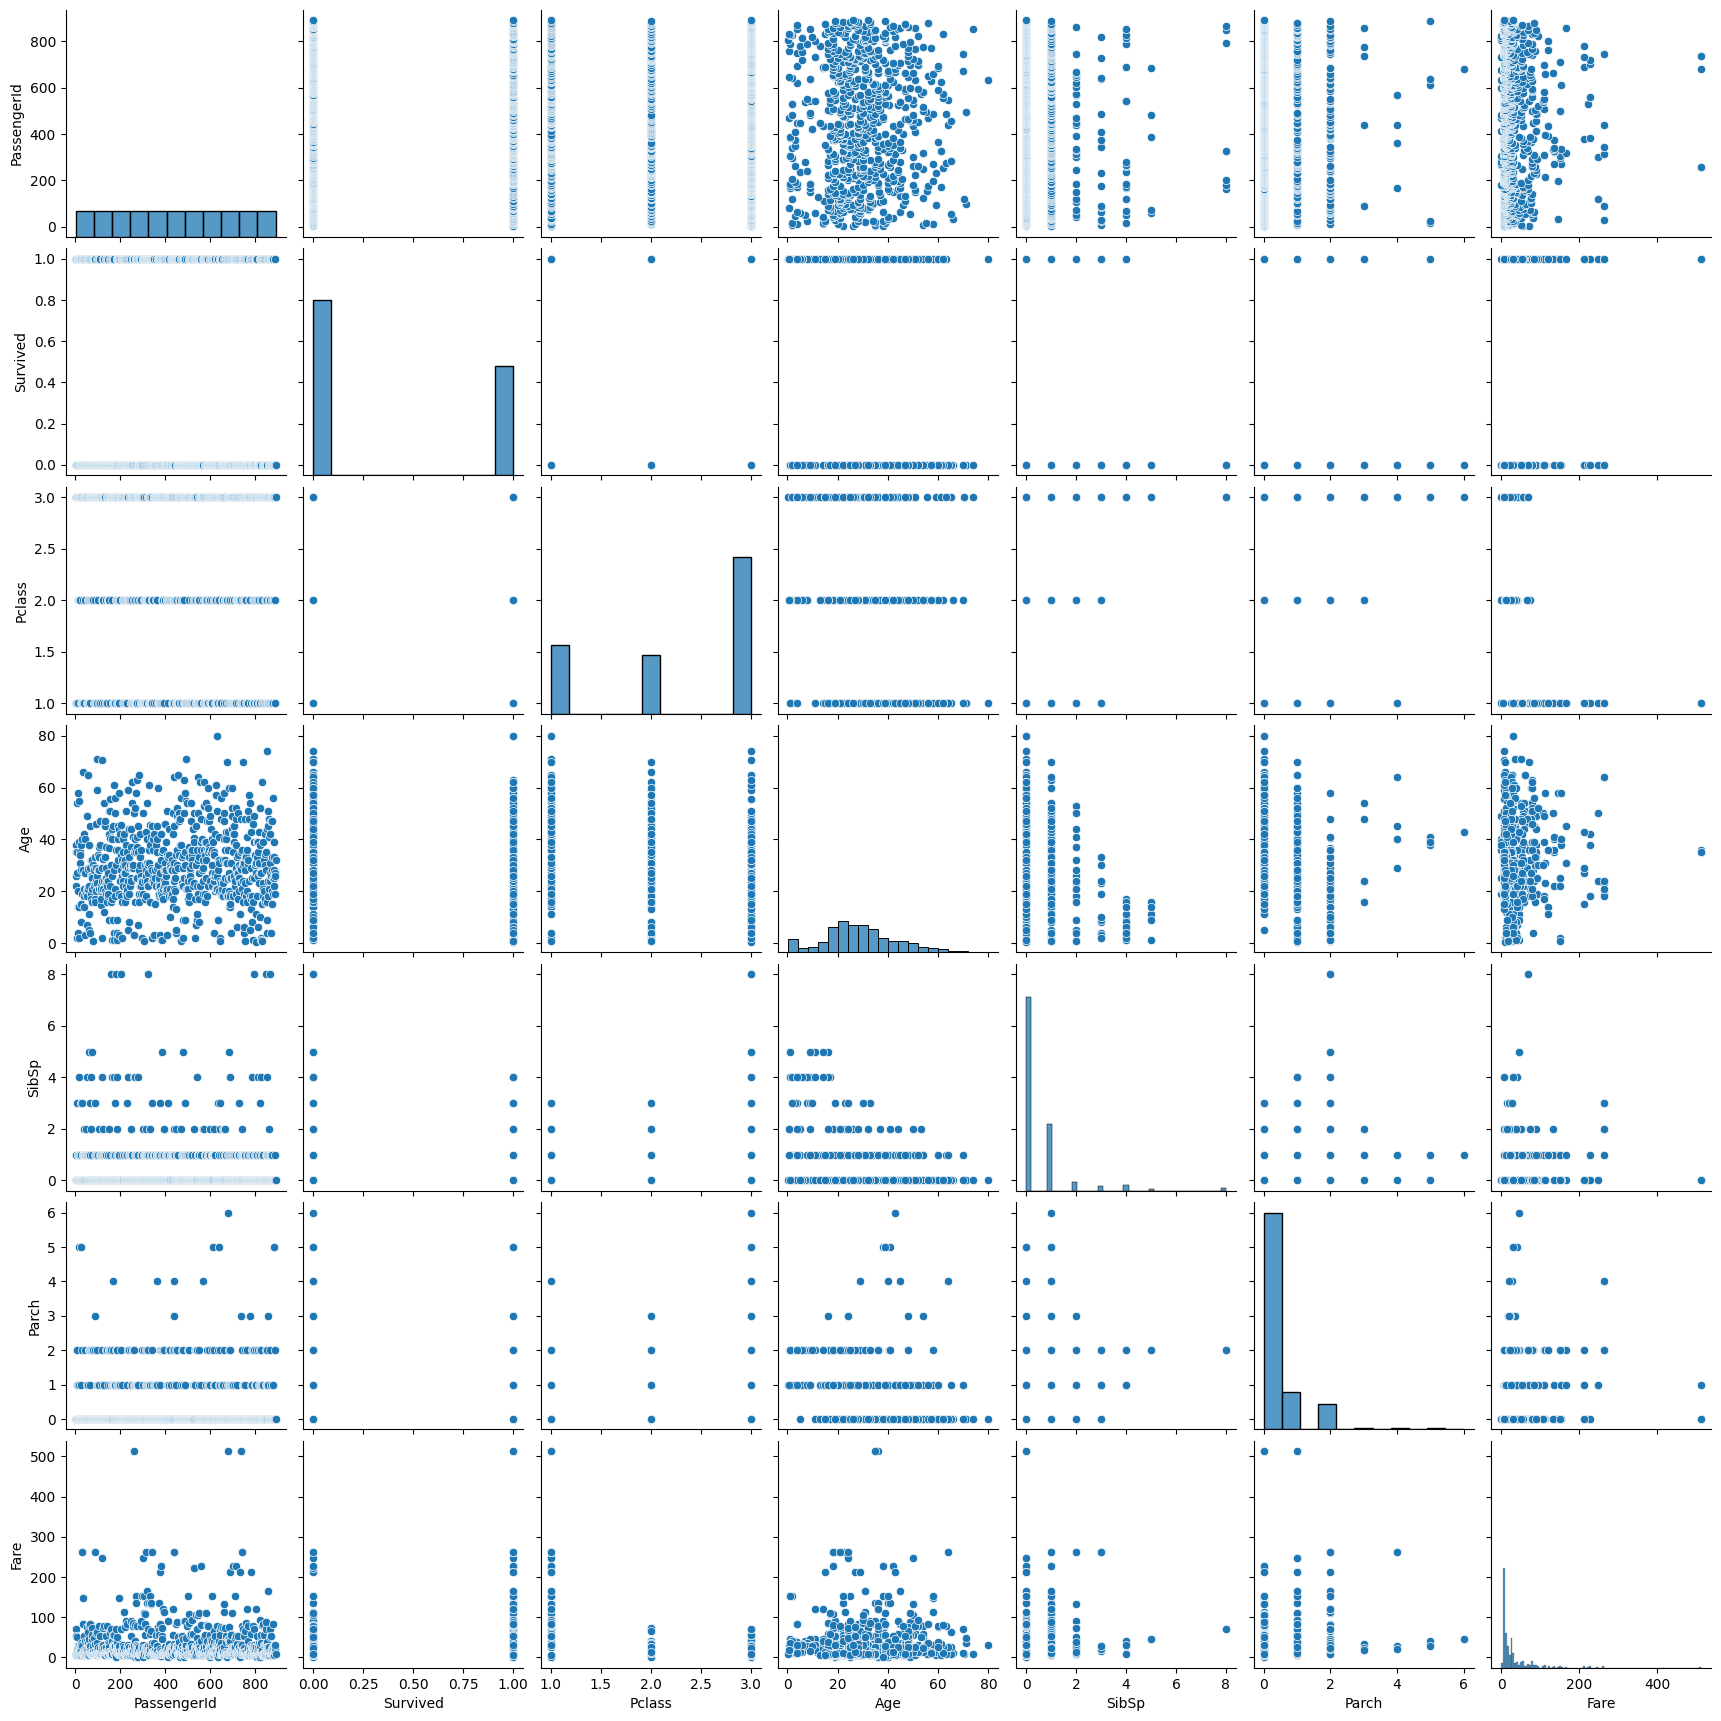

In [ ]:
import seaborn as sns

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Plotting pairplot
sns.pairplot(numerical_columns)
plt.show()